In [8]:
import pandas as pd

df = pd.read_csv('../results/shots/shots.csv')
df = pd.melt(df, id_vars=['shot', 'method'], var_name='group', value_name='acc')
df = df.sort_values('shot').reset_index(drop=True)
df['shot'] = df['shot'].apply(lambda x: f'{x}-shots')
df.head()

,shot,method,group,acc
0,4-shots,KgCoOp w/ DePT,base_acc,79.23
1,4-shots,KgCoOp,H,75.74
2,4-shots,MaPLe,H,76.19
3,4-shots,CoOp,H,73.70
4,4-shots,MaPLe w/ DePT,H,76.59


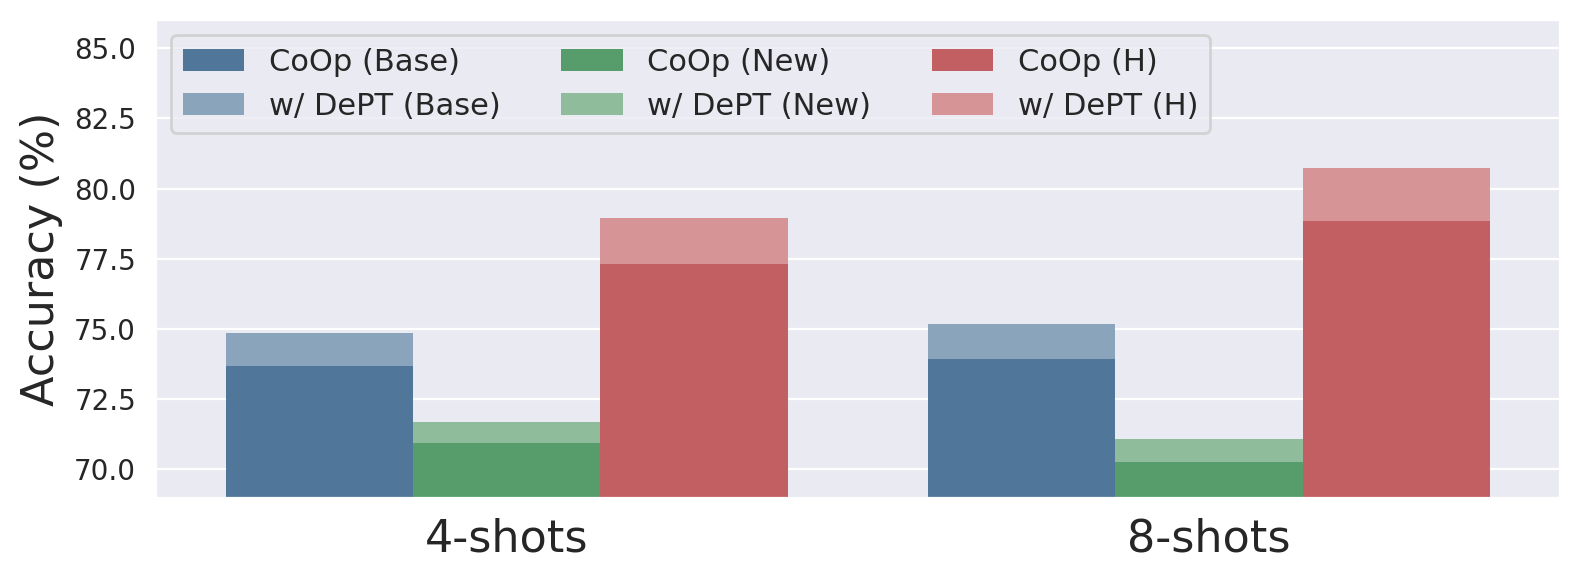

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

FONTSIZE_LABEL = 16
FONTSIZE_LEGEND = 11
Y_TITLE = -0.3
FONTSIZE_TITLE = 16
COLORBAR1 = ['#4478A6', '#4BA966', '#D24E54']
COLORBAR2 = ['#82A5C3', '#87C599', '#E1898D']

plt.figure(figsize=(8, 3), dpi=200)
sns.set_style('darkgrid')

def draw_plot(df, method, ymin, ymax):
    p1 = sns.barplot(df[df['method'] == f'{method} w/ DePT'], x='shot', y='acc', hue='group', 
                    palette=sns.color_palette(COLORBAR2), linewidth=0)
    p2 = sns.barplot(df[df['method'] == method], x='shot', y='acc', hue='group', 
                    palette=sns.color_palette(COLORBAR1), linewidth=0)

    plt.ylim(ymin, ymax)

    plt.xlabel('')
    plt.ylabel('Accuracy (%)', fontdict=dict(fontsize=FONTSIZE_LABEL))

    # base-dept, new-dept, H-dept, base-coop, new-coop, H-coop
    handles, labels = p2.get_legend_handles_labels()
    labels = ['w/ DePT (Base)', 'w/ DePT (New)', 'w/ DePT (H)', 
              f'{method} (Base)', f'{method} (New)', f'{method} (H)']
    handles = [handles[3], handles[0], handles[4], handles[1], handles[5], handles[2]]
    labels = [labels[3], labels[0], labels[4], labels[1], labels[5], labels[2]]

    plt.xticks(fontsize=FONTSIZE_LABEL)
    plt.legend(handles=handles, labels=labels, loc='upper left', ncols=3, fontsize=FONTSIZE_LEGEND)

draw_plot(df, 'CoOp', 69, 86)

plt.tight_layout()
plt.savefig('shots.jpg')
plt.show()